In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option('display.max_columns', 200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from itertools import combinations
from scipy import stats
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [2]:
from catboost import CatBoostRegressor,CatBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,StackingRegressor 
import seaborn as sns
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from xgboost import XGBRegressor

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
train_df = pd.read_csv("train_v9rqX0R.csv")
#check the info of the dataset
print(train_df.shape) 
train_df.info()
print('-'*30)
# resource_data = pd.read_csv("/content/drive/My Drive/ Deep learning assignments/ LSTM Donors_choose/resources.csv")
# #check the info of the dataset
# resource_data .info()

(8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
------------------------------


In [5]:
train_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
test_df= pd.read_csv("test_AbJTz2l.csv")
print(test_df.shape)
# test_df.fillna(-1,inplace=True)
test_df.info()

(5681, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
num_columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
# cat_columns=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
cat_columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

# Null columns and values

In [8]:
nan_=['Outlet_Size','Item_Weight']

def indecies(df,l):
    nan_col_indecies=[];nan_indecies=[]
    for i in nan_:
        s=df[df[i].isnull()].index.tolist()
        nan_col_indecies.append(s)
        nan_indecies.extend(s)
    return nan_col_indecies,nan_indecies

nan_col_indecies_tr,nan_indecies_tr = indecies(train_df,nan_)
nan_col_indecies_te,nan_indecies_te = indecies(test_df,nan_)

In [9]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Features from EDA

### 1 From Histogram

In [10]:
def Outlet_Identifier(outlet):
    if outlet in ['OUT010','OUT019']:
        return 1
    else:
        return 0
train_df['Outlet_Identifier_10-19']=train_df['Outlet_Identifier'].apply(Outlet_Identifier)
test_df['Outlet_Identifier_10-19']=test_df['Outlet_Identifier'].apply(Outlet_Identifier)

In [11]:
def Outlet_Establishment_Year_1985(year):
    if year == 1985:
        return 1
    else:
        return 0
    
train_df['is_1985'] = train_df['Outlet_Establishment_Year'].apply(Outlet_Establishment_Year_1985)
test_df['is_1985'] = test_df['Outlet_Establishment_Year'].apply(Outlet_Establishment_Year_1985)

In [12]:
def Outlet_Establishment_Year_1998(year):
    if year == 1998:
        return 1
    else:
        return 0
    
train_df['is_1998'] = train_df['Outlet_Establishment_Year'].apply(Outlet_Establishment_Year_1998)
test_df['is_1998'] = test_df['Outlet_Establishment_Year'].apply(Outlet_Establishment_Year_1998)

In [13]:
def Supermarket_Type1(outlet_type):
    if outlet_type == 'Supermarket Type1':
        return 1
    else:
        return 0
    
train_df['is_Supermarket_Type1'] = train_df['Outlet_Type'].apply(Supermarket_Type1)
test_df['is_Supermarket_Type1'] = test_df['Outlet_Type'].apply(Supermarket_Type1)

### 2 From scatterplots

In [14]:
def Item_MRP(mrp):
    if mrp<=70 :
        return 1
    elif mrp>70 and mrp<=135:
        return 2
    elif mrp>135 and mrp<=202:
        return 3
    elif mrp>202 :
        return 4
    
train_df['Item_MRP_cluster'] = train_df['Item_MRP'].apply(Item_MRP)
test_df['Item_MRP_cluster'] = test_df['Item_MRP'].apply(Item_MRP)

In [15]:
train_df['Item_Visibility_log']=np.log10(train_df['Item_Visibility']+0.001)
test_df['Item_Visibility_log']=np.log10(test_df['Item_Visibility']+0.001)

### 3 From Boxplots

In [16]:
def is_Grocery_store(outlet_type):
    if outlet_type == 'Grocery Store':
        return 1
    else:
        return 0
    
train_df['is_Grocery_Store'] = train_df['Outlet_Type'].apply(is_Grocery_store)
test_df['is_Grocery_Store'] = test_df['Outlet_Type'].apply(is_Grocery_store)

### 4 From Pairplot

In [17]:
def two_fats(fat_type):
    if fat_type == 'Low Fat':
        return 0
    elif fat_type == 'LF':
        return 0
    elif fat_type == 'low fat':
        return 0
    elif fat_type == 'Regular':
        return 1
    elif fat_type == 'reg':
        return 1
train_df['two_fats'] = train_df['Item_Fat_Content'].apply(two_fats)
test_df['two_fats'] = test_df['Item_Fat_Content'].apply(two_fats)

In [18]:
def is_Outlet_Size_small(outlet_size):
    if outlet_size == 'Small':
        return 1
    else:
        return 0
train_df['is_Small'] = train_df['Outlet_Size'].apply(is_Outlet_Size_small)
test_df['is_Small'] = test_df['Outlet_Size'].apply(is_Outlet_Size_small)

In [19]:
def Supermarket_Type3(outlet_type):
    if outlet_type == 'Supermarket Type3':
        return 1
    else:
        return 0
    
train_df['is_Supermarket_Type3'] = train_df['Outlet_Type'].apply(Supermarket_Type3)
test_df['is_Supermarket_Type3'] = test_df['Outlet_Type'].apply(Supermarket_Type3)

In [20]:
def cluster_open_year(year):
    if year <= 1990:
        return 0
    else:
        return 1
    
train_df['open_after_1990s'] = train_df['Outlet_Establishment_Year'].apply(cluster_open_year)
test_df['open_after_1990s'] = test_df['Outlet_Establishment_Year'].apply(cluster_open_year)

In [21]:
sample_df=pd.read_csv('sample_submission_8RXa3c6.csv')
sample_df.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
5,FDH56,OUT046,1000
6,FDL48,OUT018,1000
7,FDC48,OUT027,1000
8,FDN33,OUT045,1000
9,FDA36,OUT017,1000


# Model based Imputation

In [22]:
le=LabelEncoder()
train_df[cat_columns] = train_df[cat_columns].apply(le.fit_transform)
test_df[cat_columns] = test_df[cat_columns].apply(le.fit_transform)

In [23]:
t1=train_df.copy()
t2=test_df.copy()
t1.shape,t2.shape

#create a data frame without null values by combining train and test data
t1.drop(set(nan_indecies_tr),axis=0,inplace=True)
t2.drop(set(nan_indecies_te),axis=0,inplace=True)
t_tr=pd.concat([t1,t2])
t_tr.shape

(7749, 23)

In [24]:
def model_based_prediction(col_,model_,i):
    X=t_tr[col_]
    y=t_tr[nan_[i]]
    model_= model_ 
    model_.fit(X,y) #fit model
    p1=[];p2=[]
    for j in range(len(nan_col_indecies_tr[i])):
        p=model_.predict(train_df[X.columns][nan_col_indecies_tr[i][j]:nan_col_indecies_tr[i][j]+1])#prediction of the null row
        train_df[nan_[i]][nan_col_indecies_tr[i][j]:nan_col_indecies_tr[i][j]+1]=p[0] #substitute the null with predicted value
        p1.append(p)
    for j in range(len(nan_col_indecies_te[i])):
        p=model_.predict(test_df[X.columns][nan_col_indecies_te[i][j]:nan_col_indecies_te[i][j]+1])
        test_df[nan_[i]][nan_col_indecies_te[i][j]:nan_col_indecies_te[i][j]+1]=p[0]
        p2.append(p)
    return(p1,p2)

In [25]:
col_1=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Item_Visibility','Item_MRP']
p11,p12=model_based_prediction(col_1,CatBoostClassifier(silent=True),0) #pass column name and model
col_1.append(nan_[0]) #append the predicted column for better result
p21,p22=model_based_prediction(col_1,CatBoostRegressor(silent=True),1)

In [26]:
#when we combine two columns some of the elements are present only in test and not in train to substitue such elements we can 
#find similar elements which are present in train and substitute them
def similar_(k,col):
    d_tr=train_df[col].value_counts()  
    d_te=test_df[col].value_counts()
    keys=[];tr_values=[]
    for i in d_te.keys(): 
        if d_te[i]==d_te[k]:  
            if i not in missing: 
                    keys.append(i)
                    tr_values.append(d_tr[i]) 
    return keys,tr_values,d_tr,d_te

In [27]:
def replace(missing,col): 
    keys=[]
    for i in missing:
        k,v,d_tr,d_te=similar_(i,col)
        s_keys=[]
        for i in k:
            if d_tr[i]==stats.mode(v)[0][0]:
                s_keys.append(i)
                break
        if len(s_keys)==0:
            min=10;u_key=0
            for i in d_te.keys():
                if d_te[i]<=min and i not in missing:
                    min=d_te[i]
                    u_key=i
            keys.append(u_key)
        else:
            keys.append(s_keys)
    return keys

# Combined features

### combine two categorical features to create new feature

In [28]:
comb=combinations(cat_columns,2)

combined_cols2=[]
for i in comb:
    train_df[i[0]+'_'+i[1]]= train_df[i[0]].astype(str)+'_'+train_df[i[1]].astype(str)
    test_df[i[0]+'_'+i[1]]= test_df[i[0]].astype(str)+'_'+test_df[i[1]].astype(str)
    combined_cols2.append(i[0]+'_'+i[1])

In [29]:
for i in train_df.keys()[18:39]:
    missing=[]
    l1=train_df[i].value_counts().keys();l2=test_df[i].value_counts().keys()
    if len(l1)!=len(l2) or not(np.all(l1==l2)):
        for v in l2:
            if v not in(l1):
                missing.append(v)
        if len(missing)!=0:
            keys=replace(missing,i)
            for r in range(len(missing)):
                test_df[i] = test_df[i].replace(missing[r],keys[r])

# Aggregated features

### 1 Aggregated columns froms categorical  features

In [30]:
def percentile_25(x):
    return x.quantile(0.25)
def percentile_75(x):
    return x.quantile(0.75)

In [31]:
d={}
for i in num_columns:
    d[i]=['mean', 'max','min','std',percentile_25,percentile_75]
for i in cat_columns:
    d[i]=['count']

In [32]:
aggregate_features_1=[]
for i in cat_columns:
    print(i)
    print('*'*10)
    d_agg=d.copy()
#     del d_agg[i]
    agg_features = train_df.groupby([i]).agg(d_agg)
    agg_features.columns = [i+'_agg_features' + '_'.join(c).strip('_') for c in agg_features.columns] 
    aggregate_features_1.extend(agg_features.columns)
    train_df = pd.merge(train_df,agg_features, on = [i], how='left')
    test_df = pd.merge(test_df,agg_features, on = [i], how='left')

Item_Fat_Content
**********
Item_Type
**********
Outlet_Identifier
**********
Outlet_Establishment_Year
**********
Outlet_Size
**********
Outlet_Location_Type
**********
Outlet_Type
**********


### Drop highly related columns

In [33]:
corr_matrix = train_df[aggregate_features_1].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop_1 = [column for column in upper.columns if any(upper[column] > 0.90)]

len(to_drop_1)

143

### 2 Aggregated columns from combined features

In [34]:
d_2={}
for i in num_columns:
    d_2[i]=['mean','max','min',percentile_25,percentile_75]
#     d_2[i]=['mean', 'max','min','std','sum']
for i in combined_cols2:
    d_2[i]=['count']

In [35]:
aggregate_features_2=[]
for i in combined_cols2:
    print(i)
    print('*'*10)
    d_agg=d_2.copy()
#     del d_agg[i]
    agg_features = train_df.groupby([i]).agg(d_agg)
    agg_features.columns = [i+'_agg_features' + '_'.join(c).strip('_') for c in agg_features.columns] 
    aggregate_features_2.extend(agg_features.columns)
    train_df = pd.merge(train_df,agg_features, on = [i], how='left')
    test_df = pd.merge(test_df,agg_features, on = [i], how='left')

Item_Fat_Content_Item_Type
**********
Item_Fat_Content_Outlet_Identifier
**********
Item_Fat_Content_Outlet_Establishment_Year
**********
Item_Fat_Content_Outlet_Size
**********
Item_Fat_Content_Outlet_Location_Type
**********
Item_Fat_Content_Outlet_Type
**********
Item_Type_Outlet_Identifier
**********
Item_Type_Outlet_Establishment_Year
**********
Item_Type_Outlet_Size
**********
Item_Type_Outlet_Location_Type
**********
Item_Type_Outlet_Type
**********
Outlet_Identifier_Outlet_Establishment_Year
**********
Outlet_Identifier_Outlet_Size
**********
Outlet_Identifier_Outlet_Location_Type
**********
Outlet_Identifier_Outlet_Type
**********
Outlet_Establishment_Year_Outlet_Size
**********
Outlet_Establishment_Year_Outlet_Location_Type
**********
Outlet_Establishment_Year_Outlet_Type
**********
Outlet_Size_Outlet_Location_Type
**********
Outlet_Size_Outlet_Type
**********
Outlet_Location_Type_Outlet_Type
**********


### Drop highly related columns

In [36]:
# Create correlation matrix
corr_matrix = train_df[aggregate_features_2].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop_2 = [column for column in upper.columns if any(upper[column] > 0.90)]

len(to_drop_2)

675

In [37]:
#null columns if any
remove_columns=[]
for i in train_df.columns:
    if train_df[i].isna().any():
        remove_columns.append(i)
        print(i)

In [38]:
le=LabelEncoder()
train_df[combined_cols2] = train_df[combined_cols2].apply(le.fit_transform)
test_df[combined_cols2] = test_df[combined_cols2].apply(le.fit_transform)

# Min max scaling

In [39]:
for i in num_columns[0:len(num_columns)-1]:
    print(i)
    print('*'*15)
    min_=min(train_df[i])
    max_=max(train_df[i]) 
    diff=max_-min_
    train_df[i+'_min_max_scaled']=(train_df[i]-min_)/diff
    test_df[i+'_min_max_scaled']=(test_df[i]-min_)/diff

Item_Weight
***************
Item_Visibility
***************
Item_MRP
***************


In [40]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_10-19,is_1985,is_1998,is_Supermarket_Type1,Item_MRP_cluster,Item_Visibility_log,is_Grocery_Store,two_fats,is_Small,is_Supermarket_Type3,open_after_1990s,Item_Fat_Content_Item_Type,Item_Fat_Content_Outlet_Identifier,Item_Fat_Content_Outlet_Establishment_Year,Item_Fat_Content_Outlet_Size,Item_Fat_Content_Outlet_Location_Type,Item_Fat_Content_Outlet_Type,Item_Type_Outlet_Identifier,Item_Type_Outlet_Establishment_Year,Item_Type_Outlet_Size,Item_Type_Outlet_Location_Type,Item_Type_Outlet_Type,Outlet_Identifier_Outlet_Establishment_Year,Outlet_Identifier_Outlet_Size,Outlet_Identifier_Outlet_Location_Type,Outlet_Identifier_Outlet_Type,Outlet_Establishment_Year_Outlet_Size,Outlet_Establishment_Year_Outlet_Location_Type,Outlet_Establishment_Year_Outlet_Type,Outlet_Size_Outlet_Location_Type,Outlet_Size_Outlet_Type,Outlet_Location_Type_Outlet_Type,Item_Fat_Content_agg_featuresItem_Weight_mean,Item_Fat_Content_agg_featuresItem_Weight_max,Item_Fat_Content_agg_featuresItem_Weight_min,Item_Fat_Content_agg_featuresItem_Weight_std,Item_Fat_Content_agg_featuresItem_Weight_percentile_25,Item_Fat_Content_agg_featuresItem_Weight_percentile_75,Item_Fat_Content_agg_featuresItem_Visibility_mean,Item_Fat_Content_agg_featuresItem_Visibility_max,Item_Fat_Content_agg_featuresItem_Visibility_min,Item_Fat_Content_agg_featuresItem_Visibility_std,Item_Fat_Content_agg_featuresItem_Visibility_percentile_25,Item_Fat_Content_agg_featuresItem_Visibility_percentile_75,Item_Fat_Content_agg_featuresItem_MRP_mean,Item_Fat_Content_agg_featuresItem_MRP_max,Item_Fat_Content_agg_featuresItem_MRP_min,Item_Fat_Content_agg_featuresItem_MRP_std,Item_Fat_Content_agg_featuresItem_MRP_percentile_25,Item_Fat_Content_agg_featuresItem_MRP_percentile_75,Item_Fat_Content_agg_featuresItem_Outlet_Sales_mean,Item_Fat_Content_agg_featuresItem_Outlet_Sales_max,Item_Fat_Content_agg_featuresItem_Outlet_Sales_min,Item_Fat_Content_agg_featuresItem_Outlet_Sales_std,Item_Fat_Content_agg_featuresItem_Outlet_Sales_percentile_25,Item_Fat_Content_agg_featuresItem_Outlet_Sales_percentile_75,Item_Fat_Content_agg_featuresItem_Fat_Content_count,Item_Fat_Content_agg_featuresItem_Type_count,Item_Fat_Content_agg_featuresOutlet_Identifier_count,Item_Fat_Content_agg_featuresOutlet_Establishment_Year_count,Item_Fat_Content_agg_featuresOutlet_Size_count,Item_Fat_Content_agg_featuresOutlet_Location_Type_count,Item_Fat_Content_agg_featuresOutlet_Type_count,Item_Type_agg_featuresItem_Weight_mean,Item_Type_agg_featuresItem_Weight_max,Item_Type_agg_featuresItem_Weight_min,Item_Type_agg_featuresItem_Weight_std,Item_Type_agg_featuresItem_Weight_percentile_25,Item_Type_agg_featuresItem_Weight_percentile_75,Item_Type_agg_featuresItem_Visibility_mean,Item_Type_agg_featuresItem_Visibility_max,Item_Type_agg_featuresItem_Visibility_min,Item_Type_agg_featuresItem_Visibility_std,Item_Type_agg_featuresItem_Visibility_percentile_25,Item_Type_agg_featuresItem_Visibility_percentile_75,Item_Type_agg_featuresItem_MRP_mean,Item_Type_agg_featuresItem_MRP_max,Item_Type_agg_featuresItem_MRP_min,Item_Type_agg_featuresItem_MRP_std,Item_Type_agg_featuresItem_MRP_percentile_25,Item_Type_agg_featuresItem_MRP_percentile_75,Item_Type_agg_featuresItem_Outlet_Sales_mean,Item_Type_agg_featuresItem_Outlet_Sales_max,Item_Type_agg_featuresItem_Outlet_Sales_min,Item_Type_agg_featuresItem_Outlet_Sales_std,Item_Type_agg_featuresItem_Outlet_Sales_percentile_25,Item_Type_agg_featuresItem_Outlet_Sales_percentile_75,Item_Type_agg_featuresItem_Fat_Content_count,...,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Identifier_count,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Establishment_Year_count,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Size_count,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Ty

In [41]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Identifier_10-19,is_1985,is_1998,is_Supermarket_Type1,Item_MRP_cluster,Item_Visibility_log,is_Grocery_Store,two_fats,is_Small,is_Supermarket_Type3,open_after_1990s,Item_Fat_Content_Item_Type,Item_Fat_Content_Outlet_Identifier,Item_Fat_Content_Outlet_Establishment_Year,Item_Fat_Content_Outlet_Size,Item_Fat_Content_Outlet_Location_Type,Item_Fat_Content_Outlet_Type,Item_Type_Outlet_Identifier,Item_Type_Outlet_Establishment_Year,Item_Type_Outlet_Size,Item_Type_Outlet_Location_Type,Item_Type_Outlet_Type,Outlet_Identifier_Outlet_Establishment_Year,Outlet_Identifier_Outlet_Size,Outlet_Identifier_Outlet_Location_Type,Outlet_Identifier_Outlet_Type,Outlet_Establishment_Year_Outlet_Size,Outlet_Establishment_Year_Outlet_Location_Type,Outlet_Establishment_Year_Outlet_Type,Outlet_Size_Outlet_Location_Type,Outlet_Size_Outlet_Type,Outlet_Location_Type_Outlet_Type,Item_Fat_Content_agg_featuresItem_Weight_mean,Item_Fat_Content_agg_featuresItem_Weight_max,Item_Fat_Content_agg_featuresItem_Weight_min,Item_Fat_Content_agg_featuresItem_Weight_std,Item_Fat_Content_agg_featuresItem_Weight_percentile_25,Item_Fat_Content_agg_featuresItem_Weight_percentile_75,Item_Fat_Content_agg_featuresItem_Visibility_mean,Item_Fat_Content_agg_featuresItem_Visibility_max,Item_Fat_Content_agg_featuresItem_Visibility_min,Item_Fat_Content_agg_featuresItem_Visibility_std,Item_Fat_Content_agg_featuresItem_Visibility_percentile_25,Item_Fat_Content_agg_featuresItem_Visibility_percentile_75,Item_Fat_Content_agg_featuresItem_MRP_mean,Item_Fat_Content_agg_featuresItem_MRP_max,Item_Fat_Content_agg_featuresItem_MRP_min,Item_Fat_Content_agg_featuresItem_MRP_std,Item_Fat_Content_agg_featuresItem_MRP_percentile_25,Item_Fat_Content_agg_featuresItem_MRP_percentile_75,Item_Fat_Content_agg_featuresItem_Outlet_Sales_mean,Item_Fat_Content_agg_featuresItem_Outlet_Sales_max,Item_Fat_Content_agg_featuresItem_Outlet_Sales_min,Item_Fat_Content_agg_featuresItem_Outlet_Sales_std,Item_Fat_Content_agg_featuresItem_Outlet_Sales_percentile_25,Item_Fat_Content_agg_featuresItem_Outlet_Sales_percentile_75,Item_Fat_Content_agg_featuresItem_Fat_Content_count,Item_Fat_Content_agg_featuresItem_Type_count,Item_Fat_Content_agg_featuresOutlet_Identifier_count,Item_Fat_Content_agg_featuresOutlet_Establishment_Year_count,Item_Fat_Content_agg_featuresOutlet_Size_count,Item_Fat_Content_agg_featuresOutlet_Location_Type_count,Item_Fat_Content_agg_featuresOutlet_Type_count,Item_Type_agg_featuresItem_Weight_mean,Item_Type_agg_featuresItem_Weight_max,Item_Type_agg_featuresItem_Weight_min,Item_Type_agg_featuresItem_Weight_std,Item_Type_agg_featuresItem_Weight_percentile_25,Item_Type_agg_featuresItem_Weight_percentile_75,Item_Type_agg_featuresItem_Visibility_mean,Item_Type_agg_featuresItem_Visibility_max,Item_Type_agg_featuresItem_Visibility_min,Item_Type_agg_featuresItem_Visibility_std,Item_Type_agg_featuresItem_Visibility_percentile_25,Item_Type_agg_featuresItem_Visibility_percentile_75,Item_Type_agg_featuresItem_MRP_mean,Item_Type_agg_featuresItem_MRP_max,Item_Type_agg_featuresItem_MRP_min,Item_Type_agg_featuresItem_MRP_std,Item_Type_agg_featuresItem_MRP_percentile_25,Item_Type_agg_featuresItem_MRP_percentile_75,Item_Type_agg_featuresItem_Outlet_Sales_mean,Item_Type_agg_featuresItem_Outlet_Sales_max,Item_Type_agg_featuresItem_Outlet_Sales_min,Item_Type_agg_featuresItem_Outlet_Sales_std,Item_Type_agg_featuresItem_Outlet_Sales_percentile_25,Item_Type_agg_featuresItem_Outlet_Sales_percentile_75,Item_Type_agg_featuresItem_Fat_Content_count,Item_Type_agg_featuresItem_Type_count,...,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Identifier_count,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Establishment_Year_count,Outlet_Size_Outlet_Location_Type_agg_featuresItem_Type_Outlet_Size_count,Outlet_Size_Outlet_Location_Type

# Model_1

In [42]:
y=train_df['Item_Outlet_Sales']
X_1=train_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
X_test_1=test_df.drop(['Item_Identifier'],axis=1)

for i in num_columns[0:len(num_columns)-1]:
    X_1=X_1.drop([i],axis=1)
    X_test_1=X_test_1.drop([i],axis=1)
    
for i in remove_columns:
    X_1=X_1.drop([i],axis=1)
    X_test_1=X_test_1.drop([i],axis=1)
    
for i in combined_cols2:
    X_1=X_1.drop([i],axis=1)
    X_test_1=X_test_1.drop([i],axis=1)
    
for i in to_drop_1:
    X_1=X_1.drop([i],axis=1)
    X_test_1=X_test_1.drop([i],axis=1)    
    
for i in to_drop_2:
    X_1=X_1.drop([i],axis=1)
    X_test_1=X_test_1.drop([i],axis=1)   

In [43]:
print(X_1.shape)
print(X_test_1.shape)

(8523, 281)
(5681, 281)


In [44]:
extra_tr1= ExtraTreesRegressor(n_estimators=100,max_depth=6,min_samples_split=7,min_samples_leaf=5,bootstrap=False) 
extra_tr1.fit(X_1,y)
print(mean_squared_error(y,extra_tr1.predict(X_1),squared=False))

p1=extra_tr1.predict(X_test_1)

1057.384674375826


In [45]:
f_importance_df = pd.DataFrame(extra_tr1.feature_importances_, columns=['importance'], index=X_1.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

### Important features from model_1

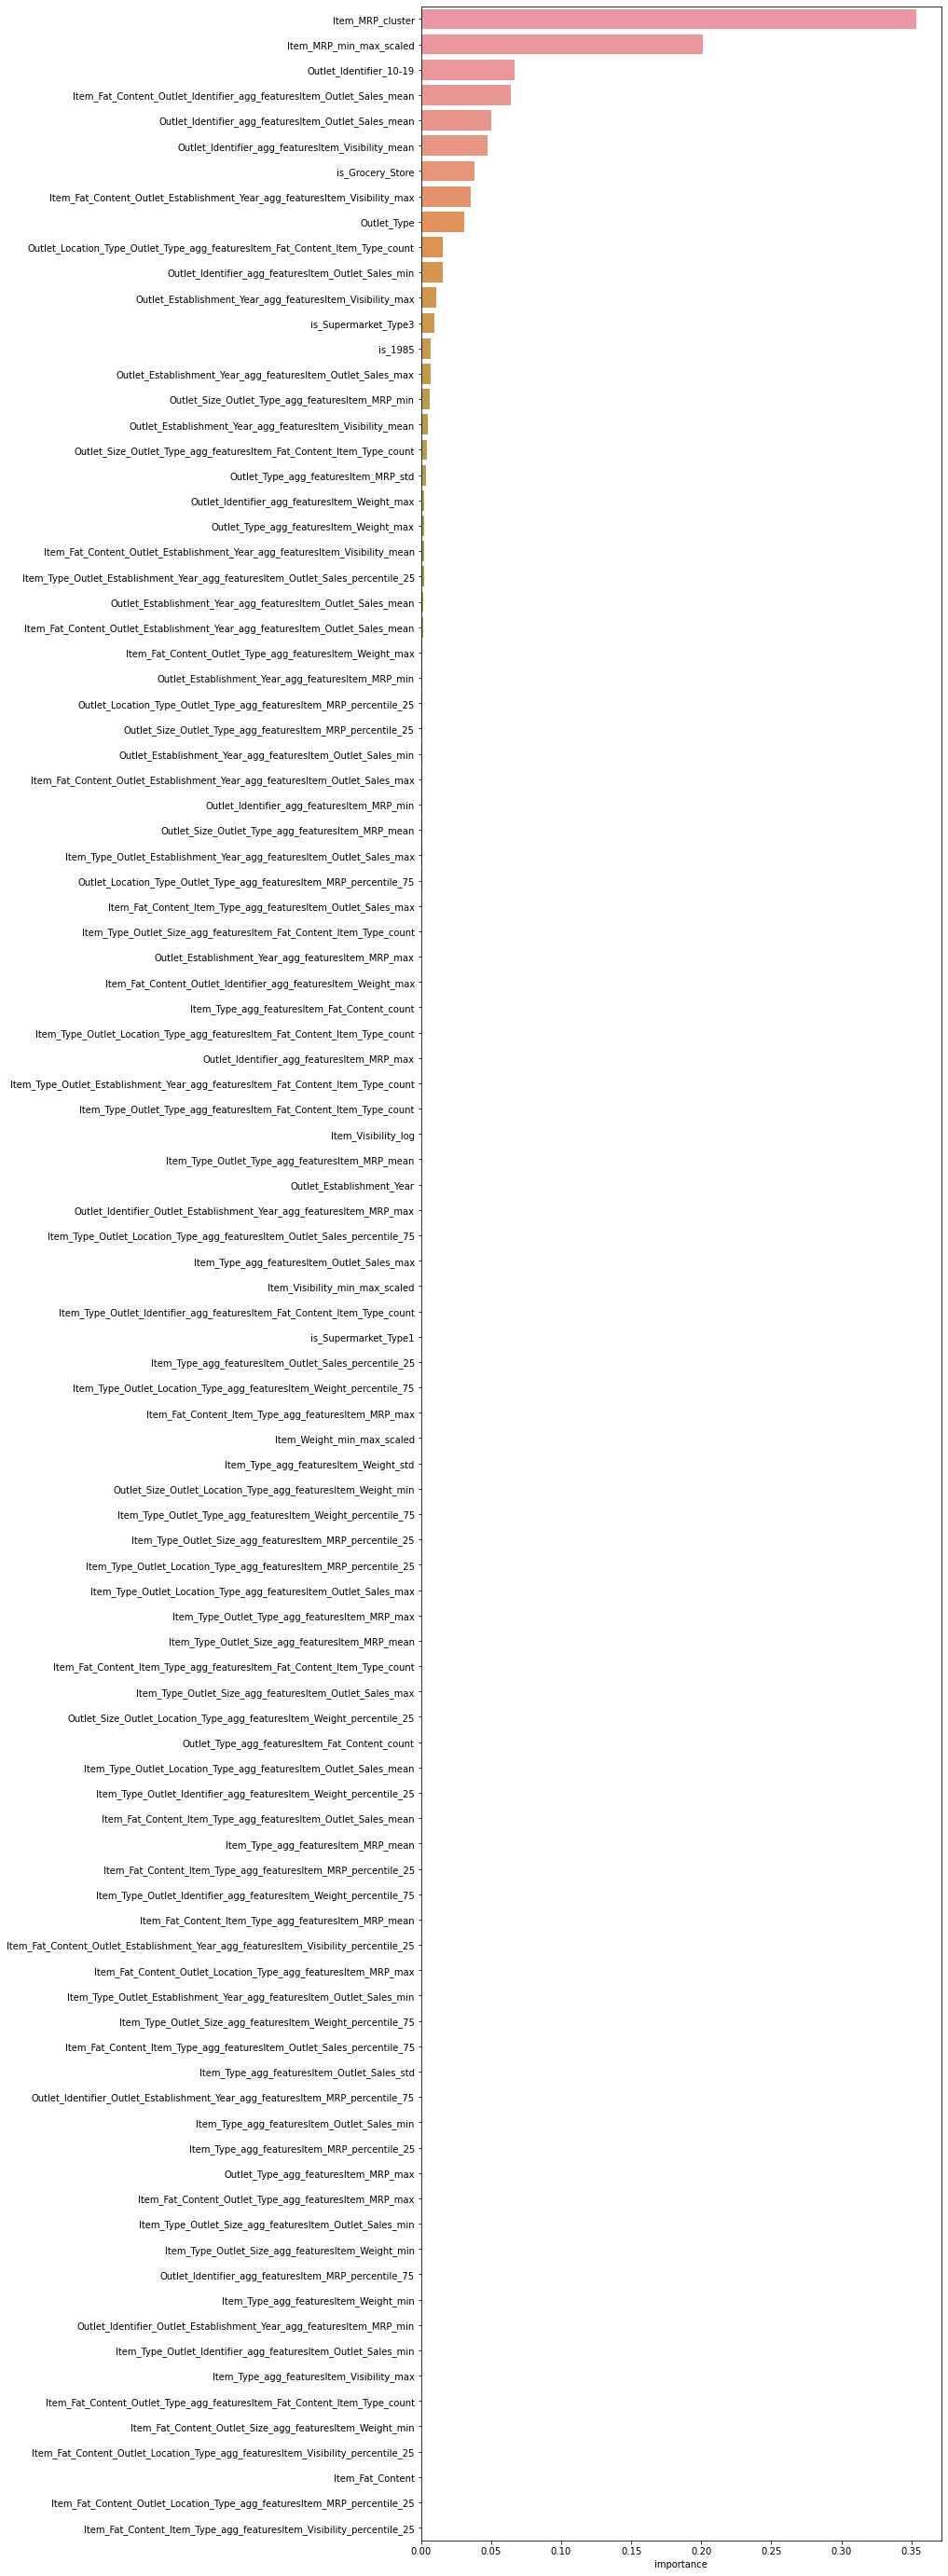

In [46]:
plt.figure(figsize=(10,50))
sns.barplot(x=f_importance_df.importance[:100], y=f_importance_df.index[:100]);

# Model_2

In [47]:
y=train_df['Item_Outlet_Sales']
X_2=train_df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)
X_test_2=test_df.drop(['Item_Identifier'],axis=1)

for i in num_columns[0:len(num_columns)-1]:
    X_2=X_2.drop([i],axis=1)
    X_test_2=X_test_2.drop([i],axis=1)
    
for i in remove_columns:
    X_2=X_2.drop([i],axis=1)
    X_test_2=X_test_2.drop([i],axis=1)

for i in aggregate_features_2:
    X_2=X_2.drop([i],axis=1)
    X_test_2=X_test_2.drop([i],axis=1)
    
for i in to_drop_1:
    X_2=X_2.drop([i],axis=1)
    X_test_2=X_test_2.drop([i],axis=1)   

In [48]:
print(X_2.shape)
print(X_test_2.shape)

(8523, 116)
(5681, 116)


In [49]:
extra_tr2= ExtraTreesRegressor(n_estimators=80,max_depth=6,min_samples_split=7,min_samples_leaf=3,bootstrap=True)  
extra_tr2.fit(X_2,y)
print(mean_squared_error(y,extra_tr2.predict(X_2),squared=False))

p2=extra_tr2.predict(X_test_2)

1059.7223608968927


In [50]:
f_importance_df = pd.DataFrame(extra_tr2.feature_importances_, columns=['importance'], index=X_2.columns)
f_importance_df = f_importance_df.sort_values(by='importance', ascending=False)

### Important features from model_2

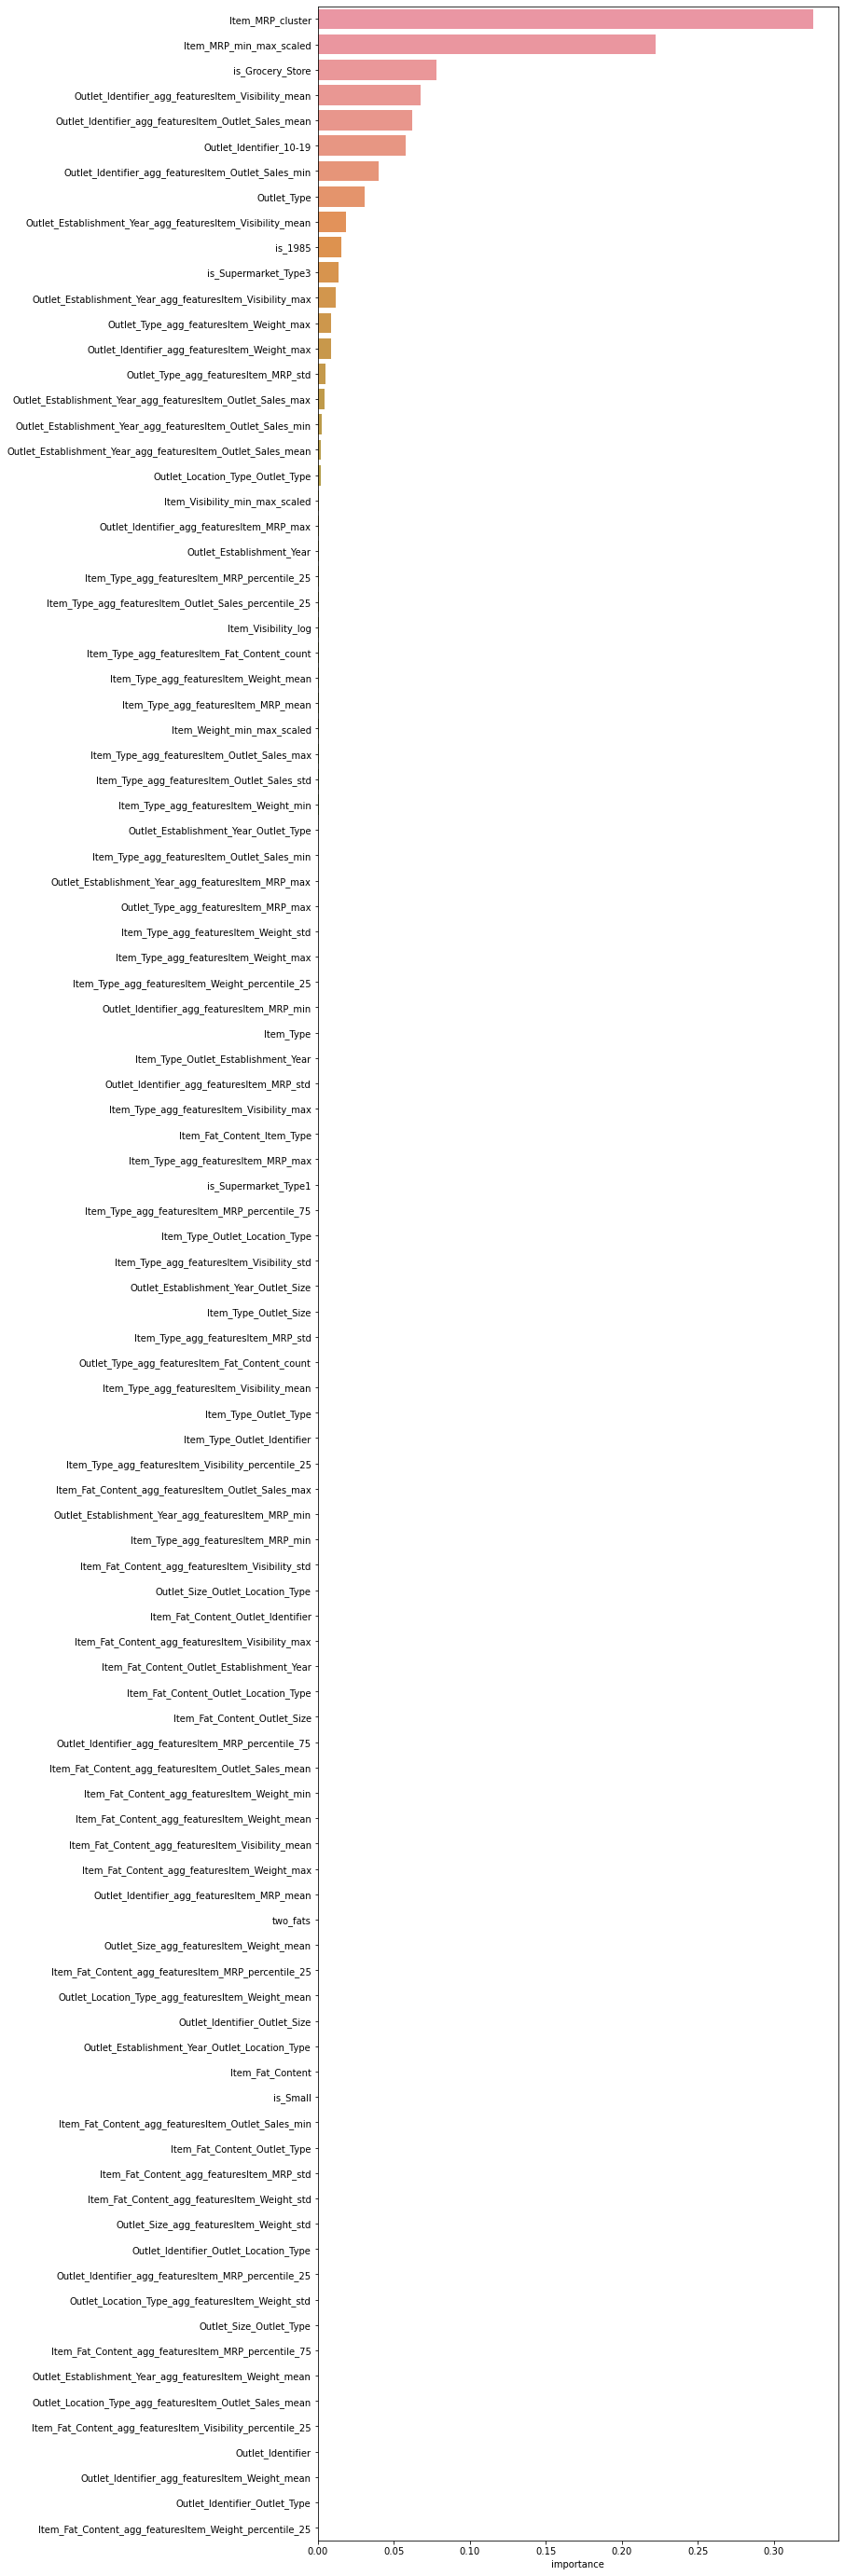

In [51]:
plt.figure(figsize=(10,50))
sns.barplot(x=f_importance_df.importance[:100], y=f_importance_df.index[:100]);

In [52]:
sample_df['Item_Outlet_Sales']=p1
sample_df.to_csv('sales_submission_final8.csv',index=False)

sample_df['Item_Outlet_Sales']=p2
sample_df.to_csv('sales_submission_final9.csv',index=False)

In [53]:
s8=pd.read_csv('sales_submission_final8.csv')
s8.head(30)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1720.876877
1,FDW14,OUT017,1473.516156
2,NCN55,OUT010,638.250793
3,FDQ58,OUT017,2616.617486
4,FDY38,OUT027,6154.633059
5,FDH56,OUT046,1865.891127
6,FDL48,OUT018,705.633265
7,FDC48,OUT027,2271.554396
8,FDN33,OUT045,1526.339087
9,FDA36,OUT017,2999.079191


In [54]:
s9=pd.read_csv('sales_submission_final9.csv')
s9.head(30)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1718.077315
1,FDW14,OUT017,1446.767206
2,NCN55,OUT010,638.537056
3,FDQ58,OUT017,2598.161521
4,FDY38,OUT027,6036.720062
5,FDH56,OUT046,1838.158854
6,FDL48,OUT018,714.376772
7,FDC48,OUT027,2398.399943
8,FDN33,OUT045,1562.244090
9,FDA36,OUT017,3004.106346


In [70]:
p3=0.2*p1+0.8*p2

In [72]:
sample_df['Item_Outlet_Sales']=p3
sample_df.to_csv('sales_submission_final_combined.csv',index=False)